

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.


### Dataset Description 

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

● ‘Neighborhood’ indicates the
<a id='intro'></a>
## Introduction

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

● ‘Neighborhood’ indicates the
location of the hospital.

● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they did not show up


## Questions to be answered

-Did Diseases affect the attendance?

-Did gender affect the attendance?

-Scholarships and showing up

-Attendance and the people who recieved SMS and who didn't

-Neighbourhood and attendance



In [5]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline



In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df.shape

(110527, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No missing values

In [8]:
df.duplicated().sum()

0

No duplicated rows

In [9]:
#some statistical values of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


There is an error in 'Age' (negative age)

In [10]:
#How many rows do contain -1 age entry?
error = df.query("Age==-1")
error

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No



### Data Cleaning
A phase where duplicated data or errors are removed to get the highest accuracy during the analysis

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#removing row with age = -1
df.drop(index=99832,inplace=True)

In [12]:
#check
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [13]:
#Rename "Hipertension" column
df.rename(columns={"Hipertension":"Hypertension"},inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [19]:
df.rename(columns={'No-show':'No_show'},inplace=True)

In [14]:
#Removing unnecessary data (will not be used in the analysis)
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)

In [15]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Data is ready for Analysis

<a id='eda'></a>
## Exploratory Data Analysis



### Displaying data and dividing data to show and noshow dataframes

### What is the percentage of missing the appointment for patients suffering from Diabetes or Hypertension or Alcoholism? 

In [16]:
#number of people who showed and didn't
df["No-show"].value_counts()

No     88207
Yes    22319
Name: No-show, dtype: int64

In [20]:
#dividing patients into two dataframes
show=df.No_show=='No'
noshow=df.No_show=='Yes'

In [21]:
def bar_plot(xlabels,ylabels,title):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    x = xlabels
    y = ylabels
    plt.title(title)
    ax.bar(x,y)
    plt.show()

In [22]:
def pie_plot(sections,counts,title):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.axis('equal')
    x = sections
    y = counts
    plt.title(tilte)
    ax.pie(y, labels = x)
    plt.show()

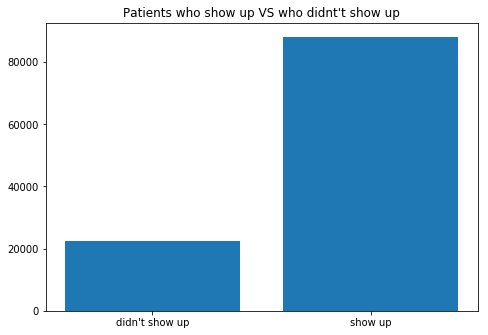

In [24]:
#let's visualize it to make it simple
x=["show up","didn't show up"]
y=[88207,22314]
bar_plot(x,y,"Patients who show up VS who didnt't show up")

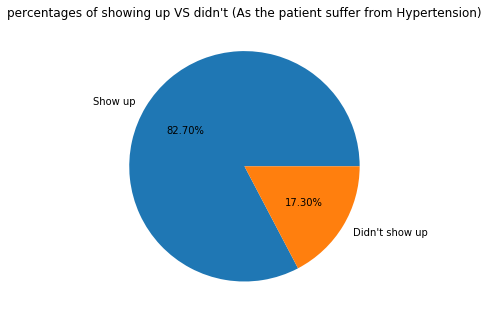

In [25]:
sections=["Show up","Didn't show up"]
counts=[18029,3772]
pie_plot(sections,counts,"percentages of showing up VS didn't (As the patient suffer from Hypertension)")

17.3% is the percentage of patients that didn't show up and suffer from Hypertension and by that Hypertension seems to have no great effect on the attendance.


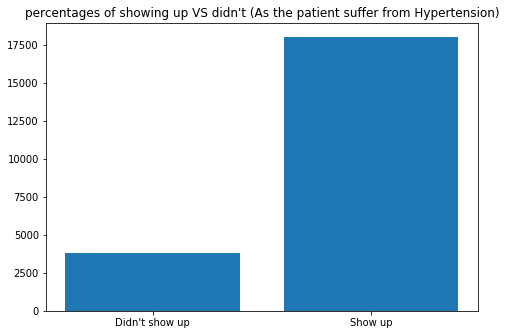

In [35]:
sections=["Show up","Didn't show up"]
counts=[18029,3772]
bar_plot(sections,counts,"percentages of showing up VS didn't (As the patient suffer from Hypertension)")

In [29]:
Diabetes=df['Diabetes'].tolist

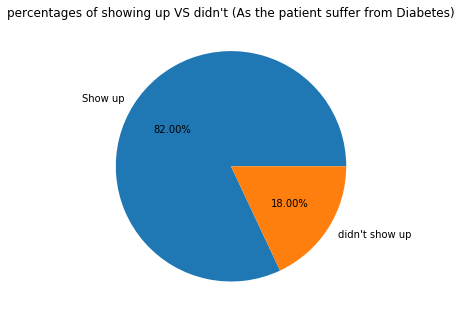

In [32]:
sections=["Show up","didn't show up"]
counts=[6513,1430]
pie_plot(sections,counts,"percentages of showing up VS didn't (As the patient suffer from Diabetes)")

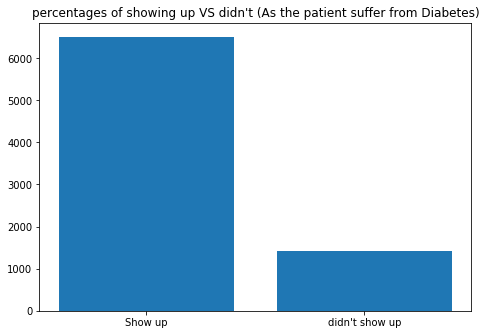

In [36]:
sections=["Show up","didn't show up"]
counts=[6513,1430]
bar_plot(sections,counts,"percentages of showing up VS didn't (As the patient suffer from Diabetes)")

18% is the percentage of patients that didn't show up and suffer from Diabetes and by that Diabetes seems to have no great effect on the attendance as well.

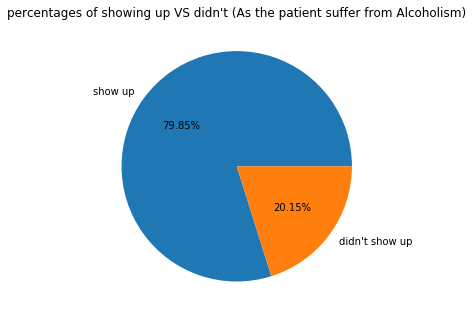

In [34]:
sections=["show up","didn't show up"]
counts=[2683,677]
pie_plot(sections,counts,"percentages of showing up VS didn't (As the patient suffer from Alcoholism)")

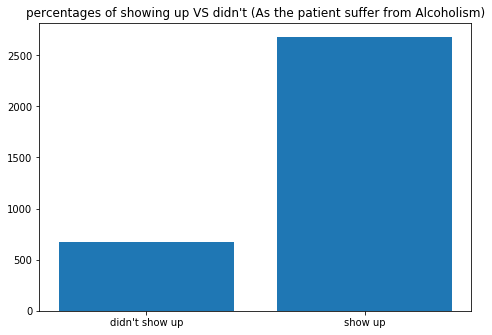

In [37]:
sections=["show up","didn't show up"]
counts=[2683,677]
bar_plot(sections,counts,"percentages of showing up VS didn't (As the patient suffer from Alcoholism)")

### DId gender affect the attendance?

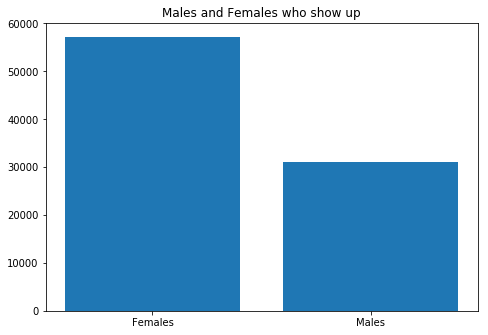

In [38]:
x=["Males","Females"]
y=[30962,57245]
bar_plot(x,y,"Males and Females who show up")

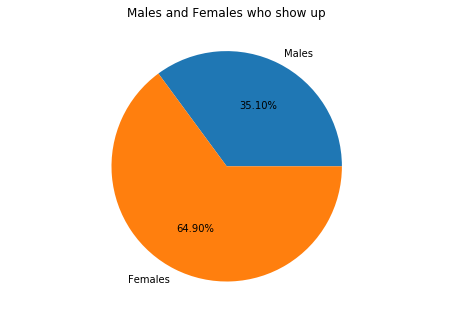

In [39]:
x=["Males","Females"]
y=[30962,57245]
pie_plot(x,y,"Males and Females who show up")

Gender did affect the attendance of the appointements as females did show up more likely than men.

# Scholarships and showing up...

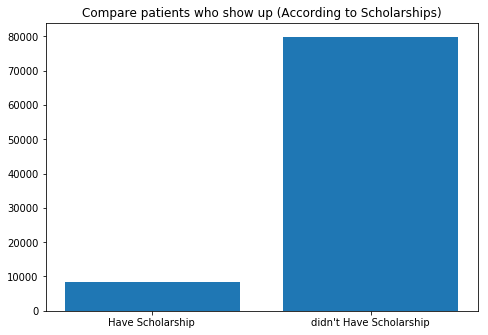

In [43]:
x=["Have Scholarship ","didn't Have Scholarship"]
y=[8283,79924]
bar_plot(x,y,"Compare patients who show up (According to Scholarships)")

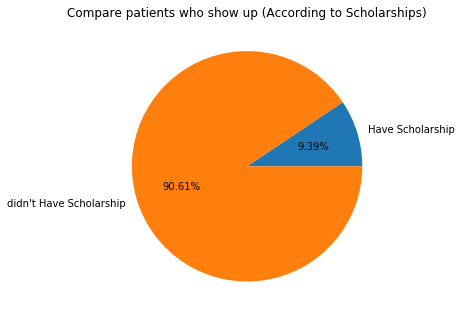

In [44]:
x=["Have Scholarship ","didn't Have Scholarship"]
y=[8283,79924]
pie_plot(x,y,"Compare patients who show up (According to Scholarships)")

Patients with scholarships are more likely to show up.

# People who recieved SMS and who didn't

In [45]:
def hist(df,col_name,attended,absent):
    plt.figure(figsize=[12,6])
    df[col_name][show].hist(alpha=.7,bins=10,color='blue',label='show')
    df[col_name][noshow].hist(alpha=.7,bins=10,color='red',label='noshow')
    plt.legend()
    plt.title('Compared to SMS')
    plt.xlabel("SMS")
    plt.ylabel("Patients Number")

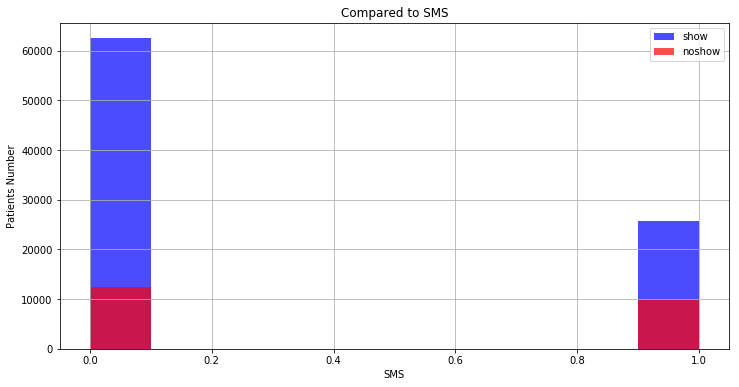

In [47]:
hist(df,'SMS_received',show,noshow)

Number of show patients with received messages are less than number of show patients without receiving messages.

# Neighbourhood and attendance

Text(0,0.5,'Patients number')

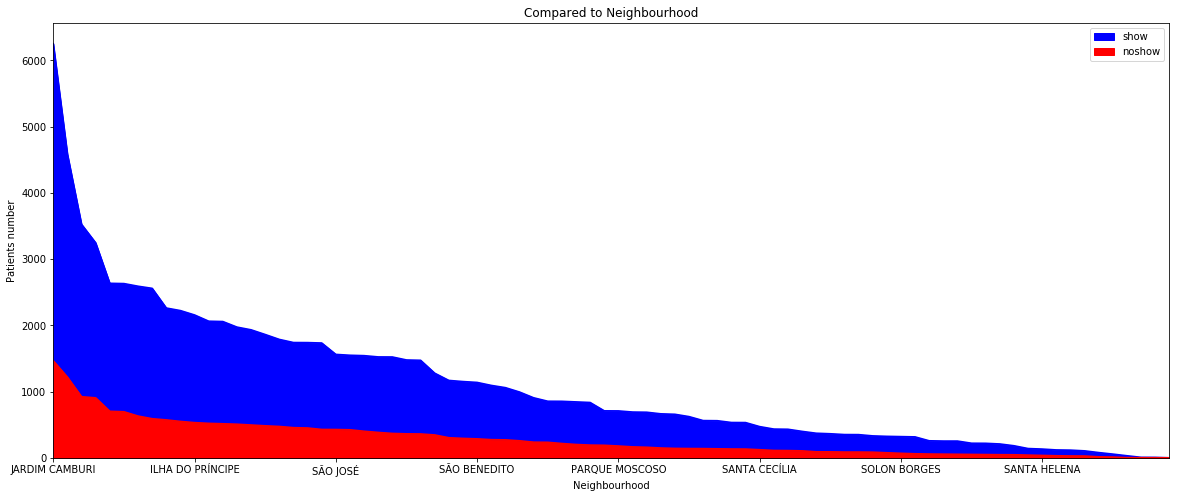

In [48]:
plt.figure(figsize=[20,8])
df.Neighbourhood[show].value_counts().plot(kind='area',color='blue',label='show')
df.Neighbourhood[noshow].value_counts().plot(kind='area',color='red',label='noshow')
plt.legend()
plt.title("Compared to Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Patients number")

AS shown Neighbourhood do affect the attendence widely.

<a id='conclusions'></a>
## Conclusions

### Results:

-There is an unpredictable result which is number of show patients with received messages are less than number of show patients without receiving messages So, we need to revise our sms system.

-Neighbourhood has a great effect on the attendance.

-Gender did affect the attendance.

-Diseases don't impact the attendance also.

-Scholarships did affect the attendence as well.


### Limitations:

-The statistics used here are descriptive wich means that we didn't create any hypoytheses.

-Data is categorical so we cannot show correlation between it's factors.

-There was an error in age column that i had to drop.

-There were some columns that weren't important in the analysis process so they were dropped as well.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0